In [ ]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
# Wczytaj dane treningowe i testowe
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

train_set = pd.read_csv('Dane/adult/adult.data', sep=", ",header = None)
test_set = pd.read_csv('Dane/adult/adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

train = train_set.replace('?', np.nan).dropna()
test = test_set.replace('?', np.nan).dropna()

train_set.head()


# Zad.
Zróbmy szybki preprocesing

In [4]:
dataset = pd.concat([train,test])

dataset['wage_class'] = dataset.wage_class.replace({'<=50K.': 0,'<=50K':0, '>50K.':1, '>50K':1})

dataset.drop(["fnlwgt"],axis=1,inplace=True)

dataset.drop(["education"],axis=1,inplace=True)

x = dataset.groupby('native_country')["wage_class"].mean()

d = dict(pd.cut(x[x.index!=" United-States"],5,labels=range(5)))

dataset['native_country'] = dataset['native_country'].replace(d)

dataset = pd.get_dummies(dataset,drop_first=True)

train = dataset.iloc[:train.shape[0]]
test = dataset.iloc[train.shape[0]:]

X_train = train.drop("wage_class",axis=1)
y_train = train.wage_class

X_test = test.drop("wage_class",axis=1)
y_test = test.wage_class


# Zad
Nauczmy prosty model.

In [5]:
from keras.models import Sequential
from keras.layers import Dense

from keras.callbacks import History

history = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               4200      
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________


Using TensorFlow backend.


In [6]:
model.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [7]:
# history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))
history = model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100)

Train on 30162 samples, validate on 15060 samples
Epoch 1/100
30162/30162 [==============================] - 2s 50us/step - loss: 0.4822 - accuracy: 0.7724 - val_loss: 0.3924 - val_accuracy: 0.8112
Epoch 2/100
30162/30162 [==============================] - 1s 46us/step - loss: 0.3876 - accuracy: 0.8092 - val_loss: 0.3779 - val_accuracy: 0.8145
Epoch 3/100
30162/30162 [==============================] - 1s 47us/step - loss: 0.3787 - accuracy: 0.8117 - val_loss: 0.3725 - val_accuracy: 0.7912
Epoch 4/100
30162/30162 [==============================] - 1s 45us/step - loss: 0.3755 - accuracy: 0.8126 - val_loss: 0.3755 - val_accuracy: 0.8077
Epoch 5/100
30162/30162 [==============================] - 1s 48us/step - loss: 0.3738 - accuracy: 0.8126 - val_loss: 0.3731 - val_accuracy: 0.8078
Epoch 6/100
30162/30162 [==============================] - 1s 46us/step - loss: 0.3712 - accuracy: 0.8119 - val_loss: 0.3667 - val_accuracy: 0.8156
Epoch 7/100
30162/30162 [==============================] - 1s 

Epoch 56/100
30162/30162 [==============================] - 1s 45us/step - loss: 0.3589 - accuracy: 0.8181 - val_loss: 0.3656 - val_accuracy: 0.8171
Epoch 57/100
30162/30162 [==============================] - 1s 45us/step - loss: 0.3601 - accuracy: 0.8178 - val_loss: 0.3809 - val_accuracy: 0.8035
Epoch 58/100
30162/30162 [==============================] - 1s 44us/step - loss: 0.3589 - accuracy: 0.8184 - val_loss: 0.3627 - val_accuracy: 0.8174
Epoch 59/100
30162/30162 [==============================] - 1s 45us/step - loss: 0.3581 - accuracy: 0.8178 - val_loss: 0.3687 - val_accuracy: 0.8159
Epoch 60/100
30162/30162 [==============================] - 1s 44us/step - loss: 0.3580 - accuracy: 0.8185 - val_loss: 0.3633 - val_accuracy: 0.8173
Epoch 61/100
30162/30162 [==============================] - 1s 44us/step - loss: 0.3576 - accuracy: 0.8206 - val_loss: 0.3687 - val_accuracy: 0.8137
Epoch 62/100
30162/30162 [==============================] - 2s 58us/step - loss: 0.3577 - accuracy: 0.8198

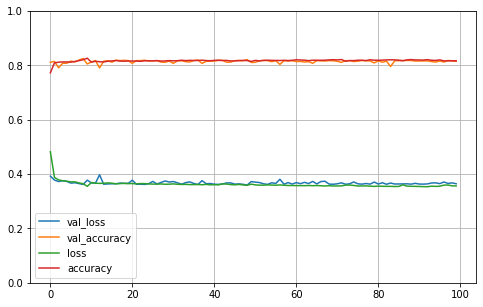

In [8]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [9]:
model.evaluate(X_test,y_test)

15060/15060 [==============================] - 0s 18us/step


[0.36438112148883967, 0.8148738145828247]

In [10]:
from sklearn import  metrics
metrics.accuracy_score(y_true= y_test, y_pred= model.predict_classes(X_test) )

0.8148738379814077

# Zad

Porównaj powyższy wynik z nauką na danych znormalizowanych z fróżnymi funkcjami aktywacji:
* sigmoid
* tanh
* relu
* elu
* LeakyReLU

In [ ]:
from sklearn.preprocessing import StandardScaler



# Zad. 
Stwórz wykres porównujący metody. 